In [1]:
from IPython.display import HTML
HTML('''<style>
            .text_cell.rendered table, .text_cell.rendered td, .text_cell.rendered th {
                font-size: 15px
                color: #D05000;
            }
            div.warn {    
                background-color: #fcf2f2;
                border-color: #dFb5b4;
                border-left: 5px solid #dfb5b4;
                padding: 0.5em;
            }
            div.rmk {    
                background-color: #d8ffe4;
                border-color: #dFb5b4;
                border-left: 5px solid #91aa99;
                padding: 0.5em;
            }
            div.note {    
                background-color: #cee9ff;
                border-color: #dFb5b4;
                border-left: 5px solid #86a2ba;
                padding: 0.5em;
            }
            .rendered_html tr, .rendered_html th, .rendered_html td {
                text-align: left;
            }
            .rendered_html :first-child {
                text-align: left;
            }
            .rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
                font-size: 16px;
            }
            .rendered_html th, .rendered_html td {
                border-bottom: 2px  #707070 solid;
                padding: 12px;
            }
            .reveal table, .reveal td, .reveal th, .reveal tr {
                font-size: 25px; }
            .reveal il{
                margin-bottom: -100px;
            }
            img[alt=drawing] { width: 200px; }
            figure{
                display: inline-block;
            }
        </style>''')

# PyTorch for Physicists <br><br> A Short Introduction to Tensor Computing and Artificial Neural Networks for Researchers



**WARNING**

I will present first how the framework works to get an idea of how the computations are done. 

It is not necessary to remember the details!

I will provide in the second part a way to write more quickly networks that work.

## Introduction
### Why deep learning frameworks?

* Easily build **large models** (computational graphs)
* Easy **gradient computation** (you do not want do do this by hand)
* **Efficient of GPU**

### Deep learning frameworks in Python

Python is arguably today the language of choice for deep learning.  
PyTorch is one of the most popular ones. 
![title](img/trends.png)



Some framework are **standalone libraries**, some are **built on an other framework** that works as a backend, usually providing a more user-friendly experience. 

We find in particular in this category [Keras](https://keras.io/) that sits on [TensorFlow](https://www.tensorflow.org/) (Google), Theano or CNTK (Microsoft) to provide an very simple and easy to use interface especially suitable for beginners.  

Recently, [PyTorch Lightning](https://www.pytorchlightning.ai/) emerged to be the equivalent of Keras for PyTorch.  

### So why PyTorch?

#### User-friendly

* Easy for beginners (especially with PyTorch Lightning)
* Large active community (as Keras/TensorFlow)
* Made for research: easy to debug, customize and expand 
* Copies almost exactly **Numpy array syntax**


#### Imperative progamming

**Imperative programming**: (PyTorch)  
If you type something, it performs the calculations as you run the instructions (like Matlab/Python)


**Declarative programming**: (Keras/TensorFlow)  
You build a *graph*, that represents the calculation that you want to perform.
Then is sent to the GPU, and only the final result is retrieved once the graph is compiled. 

*Imperative programming allows to test and debug the program as we would do with NumPy/Matlab.*


#### Fast training

PyTorch is *highly optimized for GPU calculation*

with TensorFlow, one of the best framework for training speed. 


### Tensor calculation with PyTorch

PyTorch can do basically **everything Matlab/NumPy does**, but on **GPUs** with the same syntax as **NumPy**  

Interesting regardless of neural networks!



### Basic steps for deep learning


#### Preparing the data

One of the most important part!  
There are many ways to present the data to a network, they usually yield different results.

#### Creating the model

The model is the layout of the network.  
Most network will only use the standard building blocks provided by PyTorch.  
However, PyTorch allows to easily build custom layers.



#### Training the network

Requires to:
* Find a suitable cost function
* Feed the a part of the dataset, *the training set*, to the network

#### Testing the network

The rest of the dataset, *the testing set*, is used to test the *generaization* capabilities of the network.


![title](img/earlystopping.png)
Image from https://deeplearning4j.org/docs/latest/deeplearning4j-nn-early-stopping

#### Savig and using the model

Obvious part...

### Levels of abstractions in PyTorch

3 levels:
* **Tensors**, like NumPy, but can be stored/computed on GPU. Stores data and gradient (optional),
* **Module**, a layer of the network. Stores the state of the network.

### Installing PyTorch

**Conda will be already installed on the computation server, and compiled locally to be optimized.**

But, to test on your computer, you can use the packaged version from conda.

**CPU only:**  
`conda install pytorch torchvision -c pytorch`

**GPU support (Nvidia):**  
`conda install pytorch torchvision cudatoolkit=10.2 -c pytorch`

See https://pytorch.org/get-started/locally/

## Using tensors: From NumPy to PyTorch

* Very similar to NumPy but few differences.  
The biggest one: arrays can be sent to the GPU!  


* No built-in notion of deep learning, just arrays!  
Can implement faster array type calculations even without deep learning in mind.

First of, import PyTorch:

In [2]:
import torch

### Creating tensors

In [3]:
# Create tensor from a list
a = torch.tensor([1,2,3,4]) 

In [5]:
# Create a 10 by 5 random tensor with uniform distribution between 0 and 1
b = torch.rand((10,5)) 

In [ ]:
# Create a 10 by 5 by 3 random tensor with normal distribution of mean 0 and variance 1
c = torch.randn((10,5,3))

In [ ]:
# Create a tensor with all zero or one values
d = torch.zeros((100,5))
e = torch.ones((100,5))

### From and to numpy

**from numpy array to torch tensor**

In [190]:
import numpy as np
import torch

A = np.arange(9).reshape(3,3)
B = torch.from_numpy(A.astype(np.float32))
print(B)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])


**from torch to tensor numpy array**

In [191]:
C = B.numpy()
print(C)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


### Data types

We did not specify which data type we wanted our tensors to be, so PyTorch chose for us.
We can have access to the type of variable using dtype:

In [5]:
a = torch.tensor([1,2,3,4])
a.dtype

torch.int64

In [6]:
b = torch.rand((10,5))
b.dtype

torch.float32

**Specify the data type**

In [12]:
a = torch.tensor([1,2,3,4],dtype = torch.float32)

**Casting (changing data type)**

In [11]:
# equivalent to .astype() with numpy
new_a = a.type(torch.float64)
print(new_a)

tensor([1., 2., 3., 4.], dtype=torch.float64)


Data types can be very important for deep learning applications as it sets a **limit on the precision** the calculation can reach.
Moreover, **PyTorch can be restrictive compared to numpy** when it comes to operations with multiple tenors, usually requiring that they all are of the same type.

More information about tensors data types can be found here:
[pytorch.org/docs/stable/tensor_attributes.html](https://pytorch.org/docs/stable/tensor_attributes.html)

### Array's dimension and indexing

Indexing is similarly to numpy arrays.  

#### Slicing



In [5]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# slicing from the second element to the penultimate element (not included) with a step of 2
x[1:-1:2]

tensor([1, 3, 5, 7])

In [43]:
x = torch.arange(6).reshape(2,3,1)
x.shape

torch.Size([2, 3, 1])

In [20]:
# taking the first element of the first dimension
y = x[0,:,:]
y.shape

torch.Size([3, 1])

In [18]:
# we can achieve the same result with
y = x[0,...]
y.shape

torch.Size([3, 1])

#### Increasing the dimension

Often necessary to **add an singleton dimension**, meaning adding a dimension without adding data to the tensor, in order to match a given tensor size for operation.  

For instance, you can come across a situation when you have 2D images when the program expect multi-channel images (like RGB images).  
Then the software will expect a trhee dimension tensor, the last dimension being the channel dimension, which can be equal to one.

In [6]:
x = torch.arange(4).reshape(2,2)
x.shape

torch.Size([2, 2])

In [7]:
# let's add a singleton dimension in the last position
y = x[...,None]
y.shape

torch.Size([2, 2, 1])

In [8]:
# or in the middle position
z = x[:,None,:]
z.shape

torch.Size([2, 1, 2])

#### Reducing the dimension

In [38]:
x = torch.arange(6).reshape(2,3,1)
x.shape

torch.Size([2, 3, 1])

In [26]:
# removing the last singleton dimension
y = x.squeeze(dim=-1)
y.shape

torch.Size([2, 3])

#### Reshaping tensors 

Often necessary to reshape a tensor without changing its number of elements.  

**Example:** step between a convolutional layer, where data is represented by a 3D tensor, and a fully connected layer, where input data should be a 1D tensor.  

There are many ways to manipulate tensors dimension but it is a good practice to use the `view()` function that guarantees that the  data is **not copied or modified internally**, only the metadata that tells python how to read the data. 

**Much faster** for large size tensors!

In [6]:
x = torch.arange(6).reshape(2,-1,1)
x.shape

torch.Size([2, 3, 1])

In [29]:
x = x.view(-1,6)
x.shape

torch.Size([1, 6])

 </style><div class=note>
**Note:**   The `-1`, it is a very useful way to tell the software to replace it by whatever number that allows conserving the total dimension of the tensor.
Indeed, it is in this case equivalent to `x.view(1,6)` as `1*6 = 2*3*1`.
<div/>

#### Tensor merging and concatenation

We can concatenate tensors along a given dimension so that this dimension will be the sum of the corresponding dimensions of the two arrays.  
Other dimensions must be the same size.

In [45]:
x = torch.arange(6).reshape(2,3,1)
x.shape

torch.Size([2, 3, 1])

In [46]:
# Concatenate two tensors along the last dimension
y = torch.cat((x,x), dim = -1)
y.shape

torch.Size([2, 3, 2])

We can also stack arrays in a way to create another dimension at the chosen position.

In [47]:
x = torch.tensor(([[[1],[2],[3]], [[4],[5],[6]]]))
# Stack two tensors along the second dimension
y = torch.stack((x,x), dim = 1)
y.shape

torch.Size([2, 2, 3, 1])

### Tensor operations

#### Element-wise multiplication

In [2]:
x = torch.tensor([[1,2],[3,4]])
x 

tensor([[1, 2],
        [3, 4]])

In [9]:
x.mul(x)
# or equivalently
x*x

tensor([[ 1,  4],
        [ 9, 16]])

#### Matrix multiplication

In [55]:
x.matmul(x)
# or equivalently
x @ x

tensor([[ 7, 10],
        [15, 22]])

**Also works with batches of data (dim = 3 or 4)**

Performs the operation on the last two dimensions for each 2d array of the batch.

In [9]:
x = torch.rand((10,3,6))
y = torch.rand((10,6,2))
z = x@y
z.shape

torch.Size([10, 3, 2])

#### Linear combination

In [56]:
x = torch.tensor([[1,2],[3,4]])
y = torch.tensor([[5,6],[7,8]])
z = 2*x+y
z

tensor([[ 7, 10],
        [13, 16]])

#### Mean and variance

In [10]:
x = torch.arange(4,dtype = torch.float32).reshape(2,2)
print(x)
print(x.mean(dim=1))

tensor([[0., 1.],
        [2., 3.]])
tensor([0.5000, 2.5000])


In [60]:
x.var(dim=1)

tensor([0.5000, 0.5000])

#### Usual functions

Usual functions such as exponential, sinus, log etc... are available with PyTorch tesnsors in a similar fashion as in numpy.  

More information:
* [PyTorch Tensor API](https://pytorch.org/docs/stable/tensors.html)
* [PyTorch for NumPy Users](https://github.com/wkentaro/pytorch-for-numpy-users)

Few useful ones different from numpy we will use in the following:

`torch.clamp(x,min,max)`  
$y_{i}=\left\{\begin{array}{ll}{\min } & {\text { if } x_{i}<\min } \\ {x_{i}} & {\text { if } \min \leq x_{i} \leq \max } \\ {\max } & {\text { if } x_{i}>\max }\end{array}\right.$

In [11]:
x = torch.arange(4,dtype = torch.float32).reshape(2,2)
print(x)
x.clamp(min = 2.)
# or x = torch.clamp(x,min=2.)

tensor([[0., 1.],
        [2., 3.]])


tensor([[2., 2.],
        [2., 3.]])

In [10]:
x = torch.tensor([[2]])
print(x)
# get the value of a tensor containing only one element
print(x.shape)
print(x.item())

tensor([[2]])
torch.Size([1, 1])
2


In [349]:
A = np.array([[1,2],[3,4]])
B = np.array([[1,1],[4,4]])
np.equal(A,B)

array([[ True, False],
       [False,  True]])

In [350]:
A = torch.tensor([[1,2],[3,4]])
B = torch.tensor([[1,1],[4,4]])
torch.eq(A,B)

tensor([[1, 0],
        [0, 1]], dtype=torch.uint8)

### Assigning tensors to CPU/GPU

Unlike numpy, tensors can be assigned to a GPU.

In [10]:
# select the third GPU available
#device = torch.device("cuda:2")
# or the CPU
device = torch.device("cpu")
x = torch.tensor([1,2,3,4]).to(device)
x.device 

device(type='cpu')

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

 </style><div class=rmk>
**Remark:**  Subsequent computation of the tensor will be on the selected device.  
    Calculations involving multiple tensors require those tensors to be on the same device.
<div/>


 </style><div class=note>
**Note:**  It is at this step that you select the GPU you will work on. 
If there is multiple GPUs available on a shared computation server, it is worth checking the usage of the GPU before setting the GPU.
<div/>



This can be done (usually in an SSH session on the server) using the command line `nvidia-smi`

It returns the information about the memory, power consumption and usage of the GPUs.


![](img/nvidiasmi.png)
It is obviously a good idea to chose an unused GPU.

 </style><div class=note>
**Note 2:**  For deep learning applications, it will not be necessary to individually assign tensors to GPUs. 
Instead, we will later create a model that will contain all the tensors and parameters of our networks and assign the whole model to the GPU. 
<div/>


Other ways to assign tensor to GPU/CPU:

In [93]:
# upon creation
A = torch.randn(3, 4, 5, device='cuda:2')

In [ ]:
# copy to CPU
A.cpu()

In [ ]:
#copy to GPU
A.cuda(device = 'cuda:3')

### Testing calculation on GPU vs CPU

let's connect on Fermat to do some test  
`ssh spopoff@fermat`  
`source activate py38`  
`python file.py`

**NumPy on CPU**

In [ ]:
import numpy as np
import timeit

d = 4000
A = np.random.randn(d,d).astype(np.float32)
B = np.random.randn(d,d).astype(np.float32)

calc_function_CPU = lambda: np.dot(A,B)
    
    
calc_time = timeit.timeit(calc_function_CPU, number = 10)
print(f"CPU took {calc_time}s to calculate.")

`CPU took 1.046984750777483s to calculate.`

**PyTorch on GPU**

In [ ]:
import torch
import timeit

device = torch.device("cuda:3")
d = 4000

A = torch.randn(d,d).to(device)
B = torch.randn(d,d).to(device)

calc_function_GPU = lambda: torch.mm(A,B)   
    
calc_time = timeit.timeit(calc_function_GPU, number = 10)
print(f"GPU took {calc_time}s to calculate.")

`GPU took 0.014175284653902054s to calculate.`

### A small network with `tensors` only

![](img/simple_fc.png)

It is possible to write a neural network with Tensors only, but we have to do everything *manually*!

In [79]:
import torch
dtype  =  torch.float32

# Defining input size, hidden layer size, output size and data size respectively
n_in,n_h,n_out,data_size=5,50,3,64

# create tensors for data and weights
# initialize to random
x = torch.randn(data_size,n_in).type(dtype)
y = torch.randn(data_size,n_out).type(dtype)

w1 = torch.randn(n_in,n_h).type(dtype)
w2 = torch.randn(n_h,n_out).type(dtype)

learning_rate = 1e-6

for epoch in range(10):
    # result of first layer
    h = x@w1
    # relu
    h_relu = h.clamp(min=0)
    y_pred = h_relu@w2
    # calculate loss (MSE)
    loss = (y_pred-y).pow(2).sum()
    
    # need to calculate the gradients: backward propagation
    grad_y_pred = 2.0*(y_pred-y)
    grad_w2 = h_relu.t()@grad_y_pred
    grad_h_relu = grad_y_pred@w2.t()
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t()@grad_h
    
    # update the weights (gradient descent)
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


Obviously not the way to go...

## Autograd

We can ask PyTorch to automatically compute and store gradients.

### `requires_grad=True`

**Tensors** have a property `requires_grad`. 
If set to `True`, it store both the value and the gradient.

In [24]:
x = torch.rand(1)
x.requires_grad = True

#or
x = torch.rand(1, requires_grad = True)

print(x)
print(x.grad)

tensor([0.6052], requires_grad=True)
None


`x.grad` stores the tensor of the gradient

### Autograd

Automatic calculation and storage of the gradient

In [20]:
y = 3*x**2
y.backward()
x.grad

tensor([1.9169])

`x.grad` is the gradient of `y` with respect to `x`

In [21]:
x*6

tensor([1.9169], grad_fn=<MulBackward0>)

In [23]:
x = torch.rand((2, 1), requires_grad = True) 
x

tensor([[0.3448],
        [0.4305]], requires_grad=True)

In [95]:
y = x[0]**3 + 2*x[1]**2
y.backward()
x.grad

tensor([[0.2268],
        [2.8365]])

Two element output for the gradient by the two variables `x[0]` and `x[1]`

In [25]:
x = torch.rand((2, 2), requires_grad = True) 
x

tensor([[0.0659, 0.0533],
        [0.2548, 0.6841]], requires_grad=True)

In [27]:
import torch
from torch.autograd import Variable


torch.manual_seed(1)
x = torch.Tensor([[0.1, 0.2, 0.3], [0.4, 0.6, 0.8]])

W = torch.randn((2, 2), requires_grad=True)
b = torch.randn((1, 3), requires_grad=True)



y = torch.abs(torch.sin(W@x+b))
y_ref = torch.arange(6,dtype=torch.float32).reshape(2,3)
print(y_ref.shape)
loss = ((y-y_ref)**2).sum()

loss.backward()

print(W.grad)

torch.Size([2, 3])
tensor([[-0.1057, -0.4682],
        [ 0.4047,  1.3201]])


As long as we use `torch` functions, the gradient can be calculated automatically by *Autograd*

To prevent tracking history and using memory, one can wrap a code block in with ` with torch.no_grad():`.   
This can be particularly helpful when evaluating a model because the model may have trainable parameters with `requires_grad=True`, but for which we don’t need the gradients.

In [28]:
x = torch.rand((2, 2), requires_grad = True)
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

### Our small network with Autograd

**Before**

In [43]:
import torch
dtype  =  torch.float32

# Defining input size, hidden layer size, output size and data size respectively
n_in,n_h,n_out,data_size=5,50,3,64

# create tensors for data and weights
# initialize to random
x = torch.randn(data_size,n_in).type(dtype)
y = torch.randn(data_size,n_out).type(dtype)

w1 = torch.randn(n_in,n_h).type(dtype)
w2 = torch.randn(n_h,n_out).type(dtype)

learning_rate = 1e-6

for epoch in range(10):
    # result of first layer
    h = x@w1
    # relu
    h_relu = h.clamp(min=0)
    y_pred = h_relu@w2
    # calculate loss (MSE)
    loss = (y_pred-y).pow(2).sum()
    
    # need to calculate the gradients: backward propagation
    grad_y_pred = 2.0*(y_pred-y)
    grad_w2 = h_relu.t()@grad_y_pred
    grad_h_relu = grad_y_pred@w2.t()
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t()@grad_h
    
    # update the weights (gradient descent)
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


**After**

In [45]:
import torch
from torch.autograd import Variable

# Defining input size, hidden layer size, output size and data size respectively
n_in,n_h,n_out,data_size=5,50,3,64

# create variables for data and weights + initialize to random

x = torch.randn((data_size,n_in),requires_grad = False)
y = torch.randn((data_size,n_out),requires_grad = False)

w1 = torch.randn((n_in,n_h),requires_grad = True)
w2 = torch.randn((n_h,n_out),requires_grad = True)

learning_rate = 1e-6

for epoch in range(10):
    # result of first layer
    h = x@w1
    # relu
    h_relu = h.clamp(min=0)
    y_pred = h_relu@w2
    # calculate loss (MSE)
    loss = (y_pred-y).pow(2).sum()
    
    # backward propagation done by autograd
    loss.backward()
    
    # update the weights (gradient descent)
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

Does the same thing as previously with `tensors` but the calculation of the gradients are done in the simple `loss.backward()` step

## Modules

The third level of abstraction in PyTorch.  
Modules represent layers, group of layers or full networks.  
Provided building blocks are module.

### Structure

A module is a `class` that has a:  
* a `forward(x)` functions, that calculates the output for a given input `x`
* a `backward()` functions, that calcualtes the gradients, allowing the backpropagation

In [36]:
class MyReLU(torch.autograd.Function):

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html

A large variety of typical building blocks are already provided in PyTorch (we will see them later).  
Usually, we will **never have to write `backward` functions**, as autograd will take care of it as long as the `forward` functions use `torch` functions or operations.

### Usage

Nothing much to do:
* Initialize the instance of the module
* use it *as a function*

In [37]:
from torch.nn import Linear

x = torch.tensor([-1,0,1],dtype = torch.float32)

fc = Linear(in_features = 3, out_features = 1)
y = fc(x)

y_ref = torch.tensor([1.],dtype = torch.float32)

loss = (y-y_ref)**2

loss.backward()

### Our small network with `module`s

**Before**

In [46]:
import torch
from torch.autograd import Variable

# Defining input size, hidden layer size, output size and data size respectively
n_in,n_h,n_out,data_size=5,50,3,64

# create variables for data and weights + initialize to random

x = torch.randn((data_size,n_in),requires_grad = False)
y = torch.randn((data_size,n_out),requires_grad = False)

w1 = torch.randn((n_in,n_h),requires_grad = True)
w2 = torch.randn((n_h,n_out),requires_grad = True)


learning_rate = 1e-6

for epoch in range(10):
    # result of first layer
    h = x@w1
    # relu
    h_relu = h.clamp(min=0)
    y_pred = h_relu@w2
    # calculate loss (MSE)
    loss = (y_pred-y).pow(2).sum()
    
    # backward propagation done by autograd
    loss.backward()
    
    # update the weights (gradient descent)
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

**After**

In [47]:
import torch
from torch.autograd import Variable


# Defining input size, hidden layer size, output size and data size respectively
n_in,n_h,n_out,data_size=5,50,3,64

# create variables for data and weights + initialize to random
x = torch.randn((data_size,n_in),requires_grad = False)
y = torch.randn((data_size,n_out),requires_grad = False)

model = torch.nn.Sequential(
            torch.nn.Linear(n_in,n_h),   # dense layer, i.e. matrix multiplication
            torch.nn.ReLU(),             # relu, non-linear activation function
            torch.nn.Linear(n_h,n_out))  # second dense layer
# create loss function
loss_fn = torch.nn.MSELoss(size_average=False) # Mean square error
learning_rate = 1e-6

for epoch in range(10):
    y_pred = model(x)
    
    loss = loss_fn(y_pred,y)
    # backward propagation done by autograd
    loss.backward()
    
    # update the parameters
    for param in model.parameters():
        param.data -= learning_rate*param.grad.data


In [ ]:
model = torch.nn.Sequential(
            torch.nn.Linear(n_in,n_h),   # dense layer, i.e. matrix multiplication
            torch.nn.ReLU(),             # relu, non-linear activation function
            torch.nn.Linear(n_h,n_out))  # second dense layer

is equivalent to this:

In [ ]:
class my_net(torch.nn.module):
    def __init__(self):
        # create the modules/layers we will use
        self.fc1  = torch.nn.Linear(n_in,n_h)   # dense layer, i.e. matrix multiplication
        self.relu = torch.nn.ReLU()             # relu, non-linear activation function
        self.fc2  = torch.nn.Linear(n_h,n_out)  # second dense layer
        
    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)
        return self.fc2(x)

</style><div class=note>
**Note:** 
   Again, no `backward` function as it is calculated automatically by autograd!
<div/>

## Optimizers

They update the weights for you!  
We will see the standard *stochastic gradient descent*, we will show more later.

### Usage

**Create the optimizer object**

In [45]:
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

**Need to set the grad to 0** (otherwise they accumulate)

In [46]:
optimizer.zero_grad()

**Update the parameters using the parameters**

In [47]:
optimizer.step()

### Our small network with `optimizer`

**Before**

In [1]:
import torch
from torch.autograd import Variable


# Defining input size, hidden layer size, output size and data size respectively
n_in,n_h,n_out,data_size=5,50,3,64

# create variables for data and weights + initialize to random
x = torch.randn((data_size,n_in),requires_grad = False)
y = torch.randn((data_size,n_out),requires_grad = False)

model = torch.nn.Sequential(
            torch.nn.Linear(n_in,n_h),   # dense layer, i.e. matrix multiplication
            torch.nn.ReLU(),             # relu, non-linear activation function
            torch.nn.Linear(n_h,n_out))  # second dense layer

# create loss function
loss_fn = torch.nn.MSELoss(size_average=False) # Mean square error

learning_rate = 1e-6

for epoch in range(10):
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    
    # backward propagation done by autograd
    loss.backward()
    
    # update the parameters
    for param in model.parameters():
        param.data -= learning_rate*param.grad.data


/opt/miniconda/envs/py38/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


**After**

In [2]:
import torch
from torch.autograd import Variable


# Defining input size, hidden layer size, output size and data size respectively
n_in,n_h,n_out,data_size=5,50,3,64

# create variables for data and weights + initialize to random
x = torch.randn((data_size,n_in),requires_grad = False)
y = torch.randn((data_size,n_out),requires_grad = False)

model = torch.nn.Sequential(
            torch.nn.Linear(n_in,n_h),   # dense layer, i.e. matrix multiplication
            torch.nn.ReLU(),             # relu, non-linear activation function
            torch.nn.Linear(n_h,n_out))  # second dense layer

# create loss function
loss_fn = torch.nn.MSELoss(size_average=False) # Mean square error

learning_rate = 1e-6
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

for epoch in range(10):
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    
    optimizer.zero_grad() # before the backpropagation!   
    # backward propagation done by autograd
    loss.backward()
    
    # update the parameters
    optimizer.step()


**Exercise:**

We do not know how to create a full neural network yet, by we know how to optimize a model.
We will try to solve a problem that consists in optimizing a simple model using an optimizer and the autograd.

Here is the physical problem:

* Let's consider a linear system characterized by a transmission matrix $\mathbf{H}$ (real) of size `n_out` $\times$ `n_in`.
* We send a collection of `n_inputs` random inputs, reprenseted by a matrix $\mathbf{X}$ of size `n_inputs` $\times$ `n_in`.
* We retrive the output corresponding to $\mathbf{Y} = \mathbf{X} \times \mathbf{H}^t$ of size `n_inputs` $\times$ `n_out`.
* We add a noise with a variance `noise_var` to $\mathbf{Y}$.

Because we know the system is fully described by a matrix $\mathbf{H}$, we will use a **network** with only one layer corresponding to a **dense layer** (i.e. one matrix multiplication, the coefficients being the parameters to be trained. 

Using the above example, create and train the system to find the correct matrix that correctly predict $\mathbf{Y}$.

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt


## PARAMETERS

# size of the system matrix
n_in, n_out = 6,10
# number of random input we use to estimate the response of the system
n_inputs = 25
# noise level (relative to the signal)
noise_var = 5e-2

## GENERATE THE DATA FOR THE SYSTEM IN NUMPY

# transmission matrix
H = np.random.randn(n_out, n_in)

# inputs
X = np.random.randn(n_inputs, n_in)

# outputs
Y = X@H.transpose() 

# noise
noise = np.random.randn(*Y.shape)
noise *= np.linalg.norm(Y)/np.linalg.norm(noise)*noise_var

Y += noise

In [6]:
## CONVERT DATA TO PYTORCH AND COPY TO GPU (IF AVAILABLE)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_pt = torch.from_numpy(X).to(device).type(torch.float)
Y_pt = torch.from_numpy(Y).to(device).type(torch.float)
H_pt = torch.from_numpy(H).to(device).type(torch.float)

## MODEL 
model = torch.nn.Linear(n_in, n_out).to(device)

...

Ellipsis

## A quick example

Before looking under the hood, let's see how to write the simpler network we can imagine, a fully connected network with `n_in` inputs and `n_out` outputs and one hidden layer with 10 nodes.

![](img/simple_fc.png)

### Step 1: Imports and parameters

In [7]:
import torch
import torch.nn as nn

# Defining input size, hidden layer size, output size respectively
n_in,n_h,n_out=5,50,3
# training and testing size
n_train, n_test = 10000, 1000
# noise level
noise = 0.2

### Step 2: Generate the data

We want the network to be able to differenciate 5 different binary patterns in presence of noise.  
The input of the network will be the signals and the outputs the labels (the index of the pattern).

In [17]:
device  = torch.device("cpu")#torch.device("cuda:1")
patterns = torch.tensor([[1,1,0,0,0],
                         [0,0,1,1,1],
                         [1,0,1,0,1]],
                        device = device, dtype = torch.float32)

# generate a list of integer between 0 and 5 as input information
labels_train = torch.randint(0,n_out, (n_train,))
# generate corresponding signal and add gaussian noise
signals_train = patterns[labels_train]+torch.randn(n_train,n_in)*noise

print(f"The first element looks like: {signals_train[0]}\ncorresponding to patter #{labels_train[0]}")


The first element looks like: tensor([ 0.9342,  0.7971, -0.2005,  0.2592,  0.3444])
corresponding to patter #0


### Step 3: Create the model


In [11]:
model=nn.Sequential(nn.Linear(n_in,n_h),
                    nn.ReLU(),
                    nn.Linear(n_h,n_out),
                    nn.LogSoftmax())

### Step 4: Define the loss function and the optimizer

In [12]:
criterion=torch.nn.NLLLoss()
# Construct the optimizer (Stochastic Gradient Descent)
optimizer=torch.optim.SGD(model.parameters(),lr=.05,momentum=0.9)

### Step 5: Train the network

In [13]:
for epoch in range(20):

    # Forward pass: Compute predicted y by passing the inputs to the model
    output_train=model(signals_train) # Outputs are a list of "probabilities" for each possible pattern
    
    # Compute and print loss
    loss_train=criterion(output_train,labels_train)
    
    # Get the index of max probability, i.e. the pattern that the model guessed
    labels_pred_train = output_train.argmax(dim=1, keepdim=True) 
    # number of correct guesses
    correct_train = labels_pred_train.eq(labels_train.view_as(labels_pred_train)).sum().item()
    # percentage of success
    sucess_rate_train = correct_train/n_train*100
    
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    # perform a backward pass (backpropagation), i.e. it calculates all the gradients for us
    loss_train.backward()
    # Update the parameters
    optimizer.step()
    
    print("epoch: {}\t loss: {:.3e}\t correct (train) = {:3.1f}%".format(epoch,loss_train.item(), sucess_rate_train))
    

epoch: 0	 loss: 1.128e+00	 correct (train) = 33.4%
epoch: 1	 loss: 1.107e+00	 correct (train) = 33.6%
epoch: 2	 loss: 1.069e+00	 correct (train) = 36.3%
epoch: 3	 loss: 1.020e+00	 correct (train) = 77.7%
epoch: 4	 loss: 9.619e-01	 correct (train) = 97.5%
epoch: 5	 loss: 8.992e-01	 correct (train) = 97.5%
epoch: 6	 loss: 8.330e-01	 correct (train) = 97.7%
epoch: 7	 loss: 7.639e-01	 correct (train) = 98.2%
epoch: 8	 loss: 6.919e-01	 correct (train) = 98.8%
epoch: 9	 loss: 6.174e-01	 correct (train) = 99.5%
epoch: 10	 loss: 5.413e-01	 correct (train) = 99.8%
epoch: 11	 loss: 4.660e-01	 correct (train) = 99.9%
epoch: 12	 loss: 3.941e-01	 correct (train) = 100.0%
epoch: 13	 loss: 3.287e-01	 correct (train) = 100.0%
epoch: 14	 loss: 2.718e-01	 correct (train) = 100.0%
epoch: 15	 loss: 2.240e-01	 correct (train) = 100.0%
epoch: 16	 loss: 1.846e-01	 correct (train) = 100.0%
epoch: 17	 loss: 1.524e-01	 correct (train) = 100.0%
epoch: 18	 loss: 1.261e-01	 correct (train) = 100.0%
epoch: 19	 loss

/opt/miniconda/envs/py38/lib/python3.8/site-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


### Easy improvements

#### Testing set

The accuracy we have is obtained on the training set, so on data the algorithm has already seen.  
As we saw previously, there is chances of overfitting, we need to test on data that the network has not seen.

In [ ]:
labels_test = torch.randint(0,n_out, (n_test,))
signals_test = patterns[labels_test]+torch.randn(n_test,n_in)*noise

We do the same thing as for the train set, **but** we do not update the weights using `with torch.no_grad():`

In [16]:
with torch.no_grad():
    output_test=model(signals_test)
    loss_test=criterion(output_test,labels_test)
    labels_pred_test = output_test.argmax(dim=1, keepdim=True) # get the index of the max log-probability
    correct_test = labels_pred_test.eq(labels_test.view_as(labels_pred_test)).sum().item()
    sucess_rate_test = correct_test/n_test*100

In [19]:
#reset the paramters
model=nn.Sequential(nn.Linear(n_in,n_h),
                    nn.ReLU(),
                    nn.Linear(n_h,n_out),
                    nn.LogSoftmax()).to(device) ## Model on the selected device!
criterion=torch.nn.NLLLoss()
# Construct the optimizer (Stochastic Gradient Descent)
optimizer=torch.optim.SGD(model.parameters(),lr=.05,momentum=0.9)

In [20]:
for epoch in range(20):
    # tell the module we will be training (some layers have different behaivors for train and test)
    model.train()
    output_train=model(signals_train) 
    loss_train=criterion(output_train,labels_train)
    labels_pred_train = output_train.argmax(dim=1, keepdim=True) 
    correct_train = labels_pred_train.eq(labels_train.view_as(labels_pred_train)).sum().item()
    sucess_rate_train = correct_train/n_train*100
    
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    
    model.eval() # tell the module we are not training
    with torch.no_grad():
        output_test=model(signals_test)
        loss_test=criterion(output_test,labels_test)
        labels_pred_test = output_test.argmax(dim=1, keepdim=True) # get the index of the max log-probability
        correct_test = labels_pred_test.eq(labels_test.view_as(labels_pred_test)).sum().item()
        sucess_rate_test = correct_test/n_test*100

    print("epoch: {}\t loss: {:.3e}\t correct (train) = {:3.1f}\t correct (test) = {:3.1f}%".format(
                                                epoch,loss_train.item(),
                                                sucess_rate_train, sucess_rate_test))
    

epoch: 0	 loss: 1.120e+00	 correct (train) = 8.4	 correct (test) = 28.5%
epoch: 1	 loss: 1.094e+00	 correct (train) = 29.2	 correct (test) = 63.4%
epoch: 2	 loss: 1.046e+00	 correct (train) = 62.8	 correct (test) = 80.8%
epoch: 3	 loss: 9.824e-01	 correct (train) = 81.4	 correct (test) = 92.9%
epoch: 4	 loss: 9.088e-01	 correct (train) = 92.5	 correct (test) = 98.0%
epoch: 5	 loss: 8.292e-01	 correct (train) = 97.5	 correct (test) = 99.4%
epoch: 6	 loss: 7.465e-01	 correct (train) = 99.4	 correct (test) = 99.6%
epoch: 7	 loss: 6.630e-01	 correct (train) = 99.8	 correct (test) = 99.8%
epoch: 8	 loss: 5.810e-01	 correct (train) = 99.9	 correct (test) = 100.0%
epoch: 9	 loss: 5.028e-01	 correct (train) = 100.0	 correct (test) = 100.0%
epoch: 10	 loss: 4.304e-01	 correct (train) = 100.0	 correct (test) = 100.0%
epoch: 11	 loss: 3.652e-01	 correct (train) = 100.0	 correct (test) = 100.0%
epoch: 12	 loss: 3.078e-01	 correct (train) = 100.0	 correct (test) = 100.0%
epoch: 13	 loss: 2.581e-01	

 </style><div class=note>
**Note:**  Now we use both for training and inference (testing), we need to tell the model when we are in each situation using `model.train()` and `model.eval()`.  
Some layers, such as `batchnorm`, have a different behavior during inference and training, and forgetting to use `model.eval()` will cause the system to continue to change when calculating on the testing set.  
We then need to set `model.train()` during the training part to switch back to training.
<div/>
    

#### DataLoaders

The previous example works fine as the whole dataset fits easily into our GPU memory.  
That would not be the case for large datasets. 

We usually use *Mini-batch gradient descent* optmizers, or similar approaches, that requires to take use a *part* of the data set to update the parameters. 

We will use a `DataLoader`, that allows sampling a `Dataset` to train on part of the data. 

In [19]:
from torch.utils.data import TensorDataset, DataLoader

# gather both inputs (signals) and outputs (labels) in datasets
train_dataset = TensorDataset(signals_train,labels_train)
test_dataset = TensorDataset(signals_test,labels_test)

# create dataloaders, it creates iterators that will return a number of elements corresponding to the batch size given
batch_size = 64
test_batch_size = n_test
test_loader = DataLoader(test_dataset,batch_size=test_batch_size, shuffle=True)
train_loader = DataLoader(train_dataset,batch_size=batch_size, shuffle=True)

For each epochs, instead of training on the whole data set in one time, we will iterate on small packages, or *batches*.

In [20]:
def train(model, device, train_loader, optimizer, criterion, epoch):
    # tell the module we will be training (some layers have different behaivors for train and test)
    model.train()
    
    running_loss = 0.
    total_correct = 0
    
    for batch_idx, (signals, labels) in enumerate(train_loader):
        # put the data on the device, previously on the CPU
        data, target = signals.to(device), labels.to(device)
        optimizer.zero_grad()
        # calculate the prediction of the model
        output = model(signals)
        labels_pred = output.argmax(dim=1, keepdim=True) 
        # estimate the loss
        loss = criterion(output,labels)
        # backward propagation and update of the parameters
        loss.backward()
        optimizer.step()

        # update the global loss and correct
        running_loss += loss.item()
        total_correct += labels_pred.eq(labels.view_as(labels_pred)).sum().item()
        
    print('Train Epoch: {}\tLoss: {:.6f}\tCorrect: {}/{}'.format(
                epoch, running_loss,
                total_correct, len(train_loader.dataset)
                ))
    
for epoch in range(15):
    train(model, device, train_loader, optimizer, criterion, epoch)

Train Epoch: 0	Loss: 1.383842	Correct: 9999/10000
Train Epoch: 1	Loss: 0.481260	Correct: 9999/10000
Train Epoch: 2	Loss: 0.348202	Correct: 9999/10000
Train Epoch: 3	Loss: 0.287367	Correct: 9999/10000
Train Epoch: 4	Loss: 0.243659	Correct: 10000/10000
Train Epoch: 5	Loss: 0.212670	Correct: 9999/10000
Train Epoch: 6	Loss: 0.191116	Correct: 9999/10000
Train Epoch: 7	Loss: 0.178815	Correct: 9999/10000
Train Epoch: 8	Loss: 0.165254	Correct: 9999/10000
Train Epoch: 9	Loss: 0.156728	Correct: 9999/10000
Train Epoch: 10	Loss: 0.144865	Correct: 9999/10000
Train Epoch: 11	Loss: 0.135729	Correct: 9999/10000
Train Epoch: 12	Loss: 0.133588	Correct: 9998/10000
Train Epoch: 13	Loss: 0.126325	Correct: 9999/10000
Train Epoch: 14	Loss: 0.134224	Correct: 9999/10000


Same thing to do with `test()`...

### Terminology for training

* An **epoch** is one forward and one backward pass for *all* the training example
* The **batch size** is the number of of training example in one forward/backward pass to update the weight. This is the actual data that is sent onto the GPU, so larger batches mean filling more GPU memory.
* An **iteration** is the treatment of one batch.

## Building blocks

`torch.nn` doc [here](https://pytorch.org/docs/stable/nn.html)

We present here only the most common ones.

### Functions


Layers with no trainable parameters, such as *ReLU*, can be used without using the module, look at those two examples: 

In [30]:
from torch.nn import Linear, ReLU
model=nn.Sequential(nn.Linear(n_in,n_h),
                    nn.ReLU(),
                    nn.Linear(n_h,n_out),
                    nn.ReLU())

 </style><div class=warn>
**Warning:** You have to use the module to use `Sequential`
<div/>

In [29]:
from torch.nn import Linear, Module
from torch.nn.functional import relu

class my_net(Module):
    def __init__(self, n_in,n_h,n_out):
        super().__init__()
        self.fc1  = torch.nn.Linear(n_in,n_h)   # dense layer, i.e. matrix multiplication
        self.fc2  = torch.nn.Linear(n_h,n_out)  # second dense layer
        
    def forward(self,x):
        x = self.fc1(x)
        x = relu(x)
        x = self.fc2(x)
        return relu(x)
    
model = my_net(n_in = 10, n_h = 30, n_out = 6)

**You can put almost whatever you want in the forward as long at it uses torch functions/modules so that the gradient can be calculated autmoatically**

### Layers

#### Dense layers

`torch.nn.Linear(in_features, out_features, bias=True)`

Applies a linear transformation to the incoming data: $y = xA^T + b$

Parameters:  
* `n_features` – size of each input sample
* `out_features` – size of each output sample
* `bias` – If set to False, the layer will not learn an additive bias ($b$). Default: True

#### Convolutional layers

`torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')`

* `stride` controls the stride for the cross-correlation, a single number or a one-element tuple.
* `padding` controls the amount of implicit zero-paddings on both sides for padding number of points.
* `dilation` controls the spacing between the kernel points; also known as the à trous algorithm. It is harder to describe, but this link has a nice visualization of what dilation does.
* `groups` controls the connections between inputs and outputs. in_channels and out_channels must both be divisible by groups. For example, at groups=2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels.

<figure>
    <img src='img/no_padding_no_strides_transposed.gif' alt='missing' width="200"/>
    <figcaption>no padding, no strides</figcaption>
</figure>&emsp;&emsp;&emsp;&emsp;&emsp;
<figure>
    <img src='img/arbitrary_padding_no_strides.gif' alt='missing' width="200"/>
    <figcaption>padding, no strides</figcaption>
</figure>&emsp;&emsp;&emsp;&emsp;&emsp;
<figure>
    <img src='img/no_padding_strides.gif' alt='missing' width="200"/>
    <figcaption>strides, no padding</figcaption>
</figure>&emsp;&emsp;&emsp;&emsp;&emsp;
<figure>
    <img src='img/dilation.gif' alt='missing' width="200"/>
    <figcaption>dilation</figcaption>
</figure>

Similar behavior for 1D and 3D connvolutions:

`torch.nn.Conv1d`  
`torch.nn.Conv3d`

#### Pooling layers

Allow to reduce the dimension of data, usually after convolutional layers.

##### Max Pool

`torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)`

Take the maximum squares of size `kernel_size`

Similar behavior for 1D and 3D maxpool:
  
`torch.nn.MaxPool1d`
`torch.nn.MaxPool3d`


##### Average Pool

`torch.nn.AvgPool2d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True)`
Calculat the average over  squares of size `kernel_size`

#### Activation layer

##### ReLU


**module:**
`torch.nn.ReLU(inplace=False)`

**function:**  
`torch.nn.functional.relu(input, inplace=self.inplace)`

Applies the rectified linear unit function element-wise:  
$\text{ReLU}(x)= \max(0, x)$

 </style><div class=warn>
**Note:** 
* Many variants, also `leaky relu`, `ELU`, `sigmoid`, `tanh`...
<div/>

##### Softmax


**module:**  
`torch.nn.Softmax(dim=None)`

**funciton:**  
`torch.nn.functional.softmax(input, self.dim, _stacklevel=5)`

Applies the Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1.

Softmax is defined as:  
$\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$

 </style><div class=warn>
**Note:** 
* The output is normalized to 1 and is positive, it usefull to output probabilities.
* usually used as last layer for classification. 
<div/>

##### Log Softmax

**module:**  
`torch.nn.LogSoftmax(dim=None)`

**function:**
`torch.nn.functional.log_softmax(input, self.dim, _stacklevel=5)`

Applies the $\log(\text{Softmax}(x))$ function to an n-dimensional input Tensor.  
The LogSoftmax formulation can be simplified as:


$\text{LogSoftmax}(x_{i}) = \log\left(\frac{\exp(x_i) }{ \sum_j \exp(x_j)} \right)$

#### Normalization layers

##### Batch Normalization


`torch.nn.BatchNorm2d(num_features, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)`


Applies Batch Normalization over a 4D input (a mini-batch of 2D inputs with additional channel dimension) as described in the paper Batch Normalization: 

$\frac{x - \mathrm{E}[x]}{ \sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta$

**Why?**

The distribition of the data changes inside the intermediate layers, making it more difficult for the network to adapt itself.  
Batch normalization allows a better uniformity that can help to significanlty increase the convergence.


#### Drop out

`torch.nn.Dropout(p=0.5, inplace=False)`

`torch.nn.Dropout2d(p=0.5, inplace=False)`

`torch.nn.Dropout3d(p=0.5, inplace=False)`

During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution. Each channel will be zeroed out independently on every forward call.

**Why?**  
To reduce overfitting, forbidding the system to hold most of the information on few parameters.

### Loss functions

#### Usage

In [ ]:
loss_function = torch.nn.XXLoss(param)
loss = loss_function(estiamtion,target)

#### L1 loss

`torch.nn.L1Loss(size_average=None, reduce=None, reduction='mean')`

Creates a criterion that measures the mean absolute error (MAE) between each element in the input $x$ and target $y$.

The unreduced (i.e. with `reduction` set to `'none'`) loss can be described as:  

$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad l_n = \left| x_n - y_n \right|$

where $N$ is the batch size. If `reduction` is not `'none'` (default 'mean'), then:  

$\ell(x, y) = \begin{cases} \operatorname{mean}(L), \quad \text{if reduction} = \text{'mean'}\\ \operatorname{sum}(L), \quad \text{if reduction} = \text{'sum'} \end{cases}$

$x$ and $y$ are tensors of arbitrary shapes with a total of nnn elements each.

The sum operation still operates over all the elements, and divides by $n$.

#### MSE loss (L2 loss)

`torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')`

Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input xxx and target $y$.

The unreduced (i.e. with `reduction` set to `'none'`) loss can be described as:  

$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad l_n = \left( x_n - y_n \right)^2$

where $N$ is the batch size. If `reduction` is not `'none'` (default 'mean'), then:  

$\ell(x, y) = \begin{cases} \operatorname{mean}(L), \quad \text{if reduction} = \text{'mean'}\\
\operatorname{sum}(L), \quad \text{if reduction} = \text{'sum'} \end{cases}$

$x$ and $y$ are tensors of arbitrary shapes with a total of $n$ elements each.

The sum operation still operates over all the elements, and divides by $n$.

The division by $n$ can be avoided if one sets `reduction` = `'sum'`.

#### Negative log likelyhood loss

`torch.nn.NLLLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')`


The negative log likelihood loss. It is useful to train a **classification** problem with C classes (typically with `nn.LogSoftmax()`).

The `input` given through a forward call is expected to contain log-probabilities of each class. `input` has to be a Tensor of size either $(minibatch, C)$ or $(minibatch, C, d_1, d_2, ..., d_K)$ $\geq 1$ for the $K$-dimensional case.

The unreduced (i.e. with reduction set to 'none') loss can be described as:  

$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad l_n = - w_{y_n} x_{n,y_n}, \quad w_{c} = \text{weight}[c] \cdot \mathbb{1}\{c \not= \text{ignore\_index}\}$

For `weights` = `'none'`:

$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad l_n = - x_{n,y_n}$

$y$ is the index of the correct label.


![](img/neg_log_demo.png)
    Image from [ljvmiranda921.github.io/](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/)


#### Cross entropy loss

`torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')`

This criterion combines `nn.LogSoftmax()` and `nn.NLLLoss()` in one single class.

### Optimizers

PyTorch API documentation [here](https://pytorch.org/docs/stable/optim.html).
Very nice tutorial on optimizers [here](http://ruder.io/optimizing-gradient-descent/)

#### Quick reminder

**Batch Gradient descent**

$\theta=\theta-\eta \cdot \nabla_{\theta} J(\theta)$

$\eta$: learning rate

Idea: 
* Compute the slope (gradient) of the loss function at the current point
* Move in the opposite direction of the slope increase by the computed amount

<center>
    <img src="img/GD.png" width="600">    
</center>

![test](Pictures/GD.png)


Gradient calculated on the all batch.

* Memmory demending
* Can be trapped in local minima

**Stochastic gradient descent**

$\theta=\theta-\eta \cdot \nabla_{\theta} J\left(\theta ; x^{(i)} ; y^{(i)}\right)$ 

Parameter update for each training example

**Pros**
* Frequent updates of parameters
* Skip local minima

**Cons**
* Noisy anf slow convergence
* Computationally expensive

<center>
    <img src="img/stochastic-vs-batch-gradient-descent.png" width="600"> 
    <caption>Image from [bogotobogo.com/](https://www.bogotobogo.com/python/scikit-learn/scikit-learn_batch-gradient-descent-versus-stochastic-gradient-descent.php)</caption>
</center>



**Mini-batch gradient descent**

The *trade-off*

$\theta=\theta-\eta \cdot \nabla_{\theta} J\left(\theta ; x^{(i : i+n)} ; y^{(i : i+n)}\right)$

Parameters update for mini-batch


**Importance of learning rage**

$\theta=\theta-\eta \cdot \nabla_{\theta} J(\theta)$

$\eta$: learning rate

<center>
    <img src="img/lr.png" width="600"> 
    <caption>Image from [blog.algorithmia.com](https://blog.algorithmia.com/introduction-to-optimizers/)</caption>
</center>

**Momentum**

$\nu_j=m \cdot \nu_{j-1} + (1-m)\nabla_{\theta}\cdot J(\theta_{j-1}) \\
\theta_j=\theta_{j-1}-\eta \cdot \nu_j$

$m \in [0,1]$: momentum

<center>
    <img src="img/momentum.png" width="600"> 
    <caption>Images from [medium.com](https://medium.com/machine-learning-bites/deeplearning-series-deep-neural-networks-tuning-and-optimization-39250ff7786d)</caption>
</center>

**Popular variants**

* **RMSprop**

RMSProp choses a different learning rate for each parameter and adapts the learning rate.

* **Adam**

Combines the heuristics of both Momentum and RMSProp

#### Usage

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
optimizer.zero_grad()
loss_fn(model(input), target).backward()
optimizer.step()

#### Stochastig gradient descent

`torch.optim.SGD(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False)`


Implements stochastic gradient descent (optionally with momentum).

#### RMSprop

`torch.optim.RMSprop(params, lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)`

#### Adam
`torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)`

## Examples

### Convolutional image classifier

Taken form [github/pytorch/examples](https://github.com/pytorch/examples/tree/master/mnist)

#### Imports and parameters

In [6]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

batch_size = 64
epochs = 10
learning_rate = 1e-3
device  = device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#### Import MNIST dataset


![](img/mnist.png)


In [7]:
mnist_train = datasets.MNIST("./", train=True, 
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))]),
                             target_transform=None, 
                             download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

mnist_test = datasets.MNIST("./", train=False, 
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))]),
                             target_transform=None, 
                             download=True)

test_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

#### Network architecture

<center><figure>
    <img src='img/classifier.svg' alt='missing'/>
</figure></center>

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 20, 
                               kernel_size = 5, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 20, out_channels = 50, 
                               kernel_size = 5, stride = 1)
        self.fc1 = nn.Linear(in_features = 4*4*50, out_features = 500)
        self.fc2 = nn.Linear(in_features = 500, out_features = 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        # 2D to 1D vector
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

#### Train function

In [9]:
def train( model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 350 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

#### Test function

In [10]:
def test( model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('>> Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.1f}%)'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

#### Training

In [11]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [ ]:
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

#### Results

### Exercise: Fully connected classifier

**Goal:** Do the same classifier as before but with fully connected layers.

Everything the same, just change the model.

Input images are `28` by `28`.

<center><figure>
    <img src='img/dense_net.svg' alt='missing'/>
</figure></center>

In [ ]:
class DenseNet(nn.Module):
    def __init__(self):
        super(DenseNet, self).__init__()
        ...

    def forward(self, x):
        ...
        return F.log_softmax(x, dim=1)
    
model = DenseNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

### Denoising autoencoder


#### Imports and parameters

In [40]:
import torchvision
import torch.nn as nn
import torch
from torchvision.utils import save_image

device  = device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

epochs = 250
batch_size =100
learning_rate = 0.005

#### Download the test dataset

In [4]:
# Download Data

mnist_train = torchvision.datasets.MNIST("./", train=True, 
                                     transform=torchvision.transforms.ToTensor(), 
                                     target_transform=None, 
                                     download=True)
mnist_test  = torchvision.datasets.MNIST("./", train=False, 
                                     transform=torchvision.transforms.ToTensor(), 
                                     target_transform=None, 
                                     download=True)

# Set dataloader
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True)

#### Network architecture

An auto-encoder is network, typically used for *unsupervised* learning, that outputs an image/signal of same dimension of the input one, and is trained to match the input and output.

The key elements is that inside the network, it reduces greatly the dimensionallity of the data. As it learns in a given set of images/signals, it tends to remove other type of signals, such as noise.

<center><figure>
    <img src='img/Autoencoder.png' alt='missing' width="700"/>
</figure></center>

**Idea:**
* Train without noise
* Use on noisy images

In [41]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv2d(1,32,3,padding=1),   # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.MaxPool2d(2,2)
        )
        self.layer2 = nn.Sequential(
                        nn.Conv2d(32,64,3,padding=1),   # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.MaxPool2d(2,2)
        )
        self.layer3 = nn.Sequential(
                        nn.Conv2d(64,128,3,padding=1),   # batch x 128 x 7 x 7
                        nn.ReLU()
        )

    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [42]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.ConvTranspose2d(128,64,3,2,1,1),
                        nn.ReLU()
        )
        self.layer2 = nn.Sequential(
                        nn.ConvTranspose2d(64,32,3,2,1,1),
                        nn.ReLU()
        )
        self.layer3 = nn.Sequential(
                        nn.Conv2d(32,1,3,padding=1), 
                        nn.ReLU()
        )
    def forward(self,x):
        x = self.layer1(x)      
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [43]:
autoencoder = nn.Sequential(Encoder(),
                            Decoder()
                           ).to(device)

#### Training

In [44]:
# Loss function and optimizer
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate,weight_decay=1e-5)


In [45]:
def train(autoencoder, device, train_loader, optimizer, epoch):
    autoencoder.train()
    for batch_idx, (image, target) in enumerate(train_loader):
        image,_ = image.to(device), target.to(device)
        image_noise = add_noise(image,device)
        optimizer.zero_grad()
        output = autoencoder(image)
        loss = loss_func(output,image)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0 and epoch % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(image), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

        if epoch % 10 == 0: # save images
            x = image[0:4].cpu().data
            x_hat = output[0:4].cpu().data
            x_noisy = image_noise[0:4].cpu().data
            save_image(x, './x_{}.png'.format(epoch))
            save_image(x_hat, './x_hat_{}.png'.format(epoch))
            save_image(x_noisy, './x_noisy_{}.png'.format(epoch))
            
        return loss.item()

In [47]:
best_loss = 1e10
for iepoch in range(epoch):
    current_loss = train(autoencoder, device, train_loader, optimizer, iepoch) 
    if current_loss < best_loss:
        best_loss = current_loss
        # save the best model parameters
        torch.save(autoencoder.state_dict(), 'demo_autoencoder.pkl')  

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.114566
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.112328
Train Epoch: 10 [0/60000 (0%)]	Loss: 0.119311
Train Epoch: 15 [0/60000 (0%)]	Loss: 0.118859
Train Epoch: 20 [0/60000 (0%)]	Loss: 0.107526
Train Epoch: 25 [0/60000 (0%)]	Loss: 0.113816
Train Epoch: 30 [0/60000 (0%)]	Loss: 0.112873
Train Epoch: 35 [0/60000 (0%)]	Loss: 0.109902
Train Epoch: 40 [0/60000 (0%)]	Loss: 0.090367
Train Epoch: 45 [0/60000 (0%)]	Loss: 0.103279
Train Epoch: 50 [0/60000 (0%)]	Loss: 0.106274
Train Epoch: 55 [0/60000 (0%)]	Loss: 0.089205
Train Epoch: 60 [0/60000 (0%)]	Loss: 0.086817
Train Epoch: 65 [0/60000 (0%)]	Loss: 0.079932
Train Epoch: 70 [0/60000 (0%)]	Loss: 0.072040
Train Epoch: 75 [0/60000 (0%)]	Loss: 0.057422
Train Epoch: 80 [0/60000 (0%)]	Loss: 0.046960
Train Epoch: 85 [0/60000 (0%)]	Loss: 0.040940
Train Epoch: 90 [0/60000 (0%)]	Loss: 0.040753
Train Epoch: 95 [0/60000 (0%)]	Loss: 0.034275


#### Results

In [72]:
def add_noise(inputs):
    noise = torch.randn_like(inputs)*0.5
    return inputs + noise

In [73]:
x,_ = mnist_train[20]
x_noisy = add_noise(x)[None,...]
x_hat = autoencoder(x_noisy)

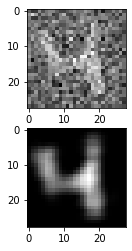

In [74]:
import matplotlib.pyplot as plt

noisy_image = x_noisy.detach().cpu().numpy()
noisy_image = noisy_image.squeeze()

denoised_image = x_hat.detach().cpu().numpy()
denoised_image = denoised_image.squeeze()

plt.figure()
plt.subplot(211)
plt.imshow(noisy_image, cmap='gray')
plt.subplot(212)
plt.imshow(denoised_image, cmap='gray')

<center>
    
**Input**  

<figure>
    <img src='img/denoise_noisy.png' alt='missing' width="400"/>
</figure><br>
    
**Output**  
    
<figure>
    <img src='img/denoise_hat.png' alt='missing' width="400"/>
</figure>
</center>

#### Loading the model parameters for inference

In [ ]:
# Recreate the same model trained
model = nn.Sequential(Encoder(),Decoder()).to(device)
# load the parameters
model.load_state_dict(torch.load('demo_autoencoder.pkl'))
# set to eval() for inference
model.eval()

In [ ]:
# use it!
output = model(input)

## Extending PyTorch

More information [here](https://pytorch.org/docs/stable/notes/extending.html) and [here](https://pytorch.org/docs/stable/jit.html)

### Simple custom functions

Let's say we want to define a new cost function to add some penalities, for example to force the output or some parameters to be sparse.
When using **only** torch function or operation, it can be done extremely easily.

In this example, we want the weight of the first linear layer to be spares (from [PyTorch forum](https://discuss.pytorch.org/t/l1-regularization-for-a-single-matrix/28088))

In [36]:
model = nn.Sequential(
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 2)
)

x = torch.randn(10, 10)
target = torch.empty(10, dtype=torch.long).random_(2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

for epoch in range(1000):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, target)
    # new loss = loss + l1 penalization on the parameters of the first layer (dense layer)
    l1_norm = torch.norm(model[0].weight, p=1)
    loss += 0.01*l1_norm
    loss.backward()
    optimizer.step()
    
    print('Epoch {}, loss {}, mat0 norm {}'.format(
        epoch, loss.item(), l1_norm.item()))

Epoch 0, loss 1.0207067728042603, mat0 norm 16.48489761352539
Epoch 1, loss 1.0204311609268188, mat0 norm 16.48284912109375
Epoch 2, loss 1.020155668258667, mat0 norm 16.480796813964844
Epoch 3, loss 1.0198808908462524, mat0 norm 16.478748321533203
Epoch 4, loss 1.019606351852417, mat0 norm 16.47669792175293
Epoch 5, loss 1.0193331241607666, mat0 norm 16.474639892578125
Epoch 6, loss 1.019060492515564, mat0 norm 16.472591400146484
Epoch 7, loss 1.0187879800796509, mat0 norm 16.470537185668945
Epoch 8, loss 1.0185158252716064, mat0 norm 16.46847152709961
Epoch 9, loss 1.0182440280914307, mat0 norm 16.466419219970703
Epoch 10, loss 1.0179729461669922, mat0 norm 16.464359283447266
Epoch 11, loss 1.0177018642425537, mat0 norm 16.46230697631836
Epoch 12, loss 1.0174312591552734, mat0 norm 16.46025276184082
Epoch 13, loss 1.017161250114441, mat0 norm 16.45819664001465
Epoch 14, loss 1.0168914794921875, mat0 norm 16.456157684326172
Epoch 15, loss 1.0166220664978027, mat0 norm 16.4541034698486

Epoch 286, loss 0.9528664946556091, mat0 norm 15.91175651550293
Epoch 287, loss 0.9526659250259399, mat0 norm 15.90981674194336
Epoch 288, loss 0.9524660706520081, mat0 norm 15.907882690429688
Epoch 289, loss 0.9522659778594971, mat0 norm 15.905956268310547
Epoch 290, loss 0.9520662426948547, mat0 norm 15.90402603149414
Epoch 291, loss 0.9518667459487915, mat0 norm 15.902087211608887
Epoch 292, loss 0.9516676664352417, mat0 norm 15.900148391723633
Epoch 293, loss 0.951468825340271, mat0 norm 15.898232460021973
Epoch 294, loss 0.9512700438499451, mat0 norm 15.896302223205566
Epoch 295, loss 0.9510716199874878, mat0 norm 15.894362449645996
Epoch 296, loss 0.9508734345436096, mat0 norm 15.892433166503906
Epoch 297, loss 0.9506756663322449, mat0 norm 15.89051342010498
Epoch 298, loss 0.9504778981208801, mat0 norm 15.888583183288574
Epoch 299, loss 0.9502804279327393, mat0 norm 15.886650085449219
Epoch 300, loss 0.9500832557678223, mat0 norm 15.884720802307129
Epoch 301, loss 0.949886560440

Epoch 583, loss 0.9032233357429504, mat0 norm 15.392643928527832
Epoch 584, loss 0.9030820727348328, mat0 norm 15.390986442565918
Epoch 585, loss 0.9029414653778076, mat0 norm 15.389336585998535
Epoch 586, loss 0.902800440788269, mat0 norm 15.387677192687988
Epoch 587, loss 0.90265953540802, mat0 norm 15.386018753051758
Epoch 588, loss 0.9025192856788635, mat0 norm 15.384360313415527
Epoch 589, loss 0.9023787975311279, mat0 norm 15.38271713256836
Epoch 590, loss 0.9022383093833923, mat0 norm 15.381056785583496
Epoch 591, loss 0.9020984172821045, mat0 norm 15.379402160644531
Epoch 592, loss 0.9019582867622375, mat0 norm 15.377756118774414
Epoch 593, loss 0.9018181562423706, mat0 norm 15.376096725463867
Epoch 594, loss 0.9016786813735962, mat0 norm 15.374441146850586
Epoch 595, loss 0.9015389680862427, mat0 norm 15.372797966003418
Epoch 596, loss 0.9013993740081787, mat0 norm 15.371145248413086
Epoch 597, loss 0.901260256767273, mat0 norm 15.369489669799805
Epoch 598, loss 0.901121020317

Epoch 818, loss 0.8738810420036316, mat0 norm 15.030091285705566
Epoch 819, loss 0.8737714886665344, mat0 norm 15.028674125671387
Epoch 820, loss 0.8736618161201477, mat0 norm 15.027236938476562
Epoch 821, loss 0.8735527992248535, mat0 norm 15.025815963745117
Epoch 822, loss 0.8734432458877563, mat0 norm 15.024380683898926
Epoch 823, loss 0.8733426332473755, mat0 norm 15.02294635772705
Epoch 824, loss 0.8732469081878662, mat0 norm 15.021590232849121
Epoch 825, loss 0.8731508255004883, mat0 norm 15.02021312713623
Epoch 826, loss 0.8730553984642029, mat0 norm 15.018838882446289
Epoch 827, loss 0.8729596734046936, mat0 norm 15.017478942871094
Epoch 828, loss 0.8728640079498291, mat0 norm 15.016105651855469
Epoch 829, loss 0.872768759727478, mat0 norm 15.014748573303223
Epoch 830, loss 0.8726729154586792, mat0 norm 15.013374328613281
Epoch 831, loss 0.8725776672363281, mat0 norm 15.01200008392334
Epoch 832, loss 0.8724824786186218, mat0 norm 15.010647773742676
Epoch 833, loss 0.87238693237

In [ ]:
def my_loss(output, target, eta=0.01):
    # L1 norm + penalization for normalization of the coefficients
    loss = F.l1_loss(output,target)+ eta* torch.norm(model[0].weight, p=1)
    return loss

### Custom layers using torch operations

In [ ]:
class ComplexLinear(Module):

    def __init__(self, in_features, out_features):
        super(ComplexLinear, self).__init__()
        self.fc_r = Linear(in_features, out_features)
        self.fc_i = Linear(in_features, out_features)

    def forward(self,input_r, input_i):
        return self.fc_r(input_r)-self.fc_i(input_i), \
        self.fc_r(input_i)+self.fc_i(input_r)

### Custom functions

Documentation [here](https://pytorch.org/docs/stable/notes/extending.html)

We can write functions from scratch.   
It is then necessary to write the `backward()` function that calculates the gradients.

In [181]:
from torch.autograd import Function

# Inherit from Function
class LinearFunction(Function):

    # Note that both forward and backward are @staticmethods
    @staticmethod
    # bias is an optional argument
    def forward(ctx, input, weight, bias=None):
        # save current values for gradient calculation
        ctx.save_for_backward(input, weight, bias)
        output = input.mm(weight.t())
        if bias is not None:
            output += bias.unsqueeze(0).expand_as(output)
        return output
        # This function has only a single output, so it gets only one gradient

In [ ]:
    @staticmethod
    def backward(ctx, grad_output):
        # This is a pattern that is very convenient - at the top of backward
        # unpack saved_tensors and initialize all gradients w.r.t. inputs to
        # None. Thanks to the fact that additional trailing Nones are
        # ignored, the return statement is simple even when the function has
        # optional inputs.
        input, weight, bias = ctx.saved_tensors
        grad_input = grad_weight = grad_bias = None

        # These needs_input_grad checks are optional and there only to
        # improve efficiency. If you want to make your code simpler, you can
        # skip them. Returning gradients for inputs that don't require it is
        # not an error.
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mm(weight)
        if ctx.needs_input_grad[1]:
            grad_weight = grad_output.t().mm(input)
        if bias is not None and ctx.needs_input_grad[2]:
            grad_bias = grad_output.sum(0).squeeze(0)

        return grad_input, grad_weight, grad_bias

### Custom modules

Documentation [here](https://pytorch.org/docs/stable/notes/extending.html)

We can create a subclass of `torch.nn.Module` with:
* trainable parameters by creating `nn.Parameter`s or registering parameters `register_parameter()`.
* non trainable parameters using `register_buffer`

In [182]:
from torch.nn import Module

class Linear(Module):
    def __init__(self, input_features, output_features, bias=True):
        super(Linear, self).__init__()
        self.input_features = input_features
        self.output_features = output_features

        # nn.Parameter is a special kind of Tensor, that will get automatically registered as 
        # Module's parameter once it's assigned as an attribute. Parameters and buffers 
        # need to be registered, or they won't appear in .parameters() 
        # (doesn't apply to buffers), and won't be converted when e.g. .cuda() is called. 
        # You can use  .register_buffer() to register buffers.
        # nn.Parameters require gradients by default.
        self.weight = nn.Parameter(torch.Tensor(output_features, input_features))
        if bias:
            self.bias = nn.Parameter(torch.Tensor(output_features))
        else:
            # You should always register all possible parameters, but the
            # optional ones can be None if you want.
            self.register_parameter('bias', None)

        # Not a very smart way to initialize weights
        self.weight.data.uniform_(-0.1, 0.1)
        if bias is not None:
            self.bias.data.uniform_(-0.1, 0.1)

    def forward(self, input):
        # We call the function we created previously
        return LinearFunction.apply(input, self.weight, self.bias)

### *Just-in-time* compiling 

The above ways to create custom functions and layers use pure Python code.  
Hence, the code is interpreded, on the other hand the provided building blocks are written in C++ and optimized.  
If the code involves many calculations, it can lead to significantly long computation time.  

PyTorch provide [*just-in-time compiling* tools](https://pytorch.org/docs/stable/jit.html) that will allows to write pure Python code that will be compiled and optimized automatically.

It has two positive aspectes:

* It allows to create models that could be used outside Python (not so much interesting for us),
* It allows optimizations and improving performance, both during training and inference.

We will very quickly go through the two methods.

#### Tracing

**Step 1:** Create a function

In [184]:
import torch
def foo(x, y):
    return 2 * x + y

**Step 2:** Turn the Python code into a TorchScript program.

In [185]:
traced_foo = torch.jit.trace(foo, (torch.rand(3), torch.rand(3)))

In [ ]:
x = torch.rand(3); y = torch.rand(3)
z = traced_foo(x,y)

 </style><div class=warn>
**Warning:**  You need to provide examples, i.e. arbitrary tensors of the same size you will use later, for the tracing.
Here we use `(torch.rand(3), torch.rand(3)`
<div/>

Some limitations, read the [docs](https://www.google.com/search?client=ubuntu&channel=fs&q=pytorch+script+module&ie=utf-8&oe=utf-8)

#### Scripting

You can write TorchScript code directly using Python syntax. You do this using:  
* the `\@torch.jit.script` decorator (for functions),
* the `\@torch.jit.script_method` decorator (for methods) on subclasses of `ScriptModule` 

**Scripting a function**

In [186]:
import torch
@torch.jit.script
def foo(x, y):
    if x.max() > y.max():
        r = x
    else:
        r = y
    return r

**Scripting a module**

In [ ]:
import torch
class MyModule(torch.jit.ScriptModule):
    def __init__(self, N, M):
        super(MyModule, self).__init__()
        self.weight = torch.nn.Parameter(torch.rand(N, M))

    @torch.jit.script_method
    def forward(self, input):
        return self.weight.mv(input)

 </style><div class=warn>
**Warning:**  The new module inherits from `torch.jit.ScriptModule` instead of `torch.nn.Module`
<div/>

Some limitations, read the [docs](https://www.google.com/search?client=ubuntu&channel=fs&q=pytorch+script+module&ie=utf-8&oe=utf-8) but allows more features than tracing (see [here](https://stackoverflow.com/questions/53900396/what-are-torch-scripts-in-pytorch))

Possilibty to save and load `ScriptModule`s

## PyTorch Lightning

### What is it?
* Build over PyTorch
* Simplify codes
* Allow spending less time on *details* for first tests
* Allow avoiding stupid mistakes (e.g. forgetting `model.eval()`)

### Installation
```bash
conda install -c conda-forge pytorch-lightning 
```

or 

```bash
pip install pytorch-lightning 
```

### From PyTorch to Lightning

**PyTorch model**

In [10]:
from torch.nn import Module
from torch import nn

class DenseNet(Module):
    def __init__(self):
        super(DenseNet, self).__init__()
        self.fc1 = nn.Linear(in_features = 28*28, out_features = 128)
        self.fc2 = nn.Linear(in_features = 128, out_features = 256)
        self.fc3 = nn.Linear(in_features = 256, out_features = 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return F.log_softmax(x, dim=1)


**PyTorch Lightning model**

In [18]:
from pytorch_lightning import LightningModule
from torch import nn

class DenseNet(LightningModule):
    def __init__(self):
        super(DenseNet, self).__init__()
        self.fc1 = nn.Linear(in_features = 28*28, out_features = 128)
        self.fc2 = nn.Linear(in_features = 128, out_features = 256)
        self.fc3 = nn.Linear(in_features = 256, out_features = 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return F.log_softmax(x, dim=1)

**What is the difference?**

How to train the model?

**PyTorch**

Dataset (this part is the same for both)

In [22]:
from torchvision import datasets, transforms
import torch
from torch import optim
import torch.nn.functional as F

device  = device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

batch_size = 64
epochs = 10
learning_rate = 1e-3

mnist_train = datasets.MNIST("./", train=True, 
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))]),
                             target_transform=None, 
                             download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

mnist_test = datasets.MNIST("./", train=False, 
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))]),
                             target_transform=None, 
                             download=True)

test_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

In [ ]:
def train( model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 350 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test( model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('>> Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.1f}%)'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
model = DenseNet().to(device)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

**PyTorch Lightning**

In [28]:

import torch
from torch import optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
from torchvision import transforms
import pytorch_lightning as pl

class DenseNet(LightningModule):
    def __init__(self):
        super(DenseNet, self).__init__()
        self.fc1 = nn.Linear(in_features = 28*28, out_features = 128)
        self.fc2 = nn.Linear(in_features = 128, out_features = 256)
        self.fc3 = nn.Linear(in_features = 256, out_features = 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return F.log_softmax(x, dim=1)

    def configure_optimizers(self):
        optimizer = optim.SGD(self.parameters(), lr=1e-3, momentum=0.9)
        return optimizer

    
    def training_step(self, train_batch, batch_idx):
        data, target = train_batch
        output = self.forward(data)
        loss = F.nll_loss(output, target, reduction='sum')
        self.log('train_loss', loss)
        return loss
    

    def validation_step(self, train_batch, batch_idx):
        data, target = train_batch
        output = self.forward(data)
        loss = F.nll_loss(output, target, reduction='sum')
        self.log('val_loss', loss)   


In [ ]:
# model
model = DenseNet()

##training
# gpu
# trainer = pl.Trainer(gpus=[0])
# cpu
trainer = pl.Trainer()

trainer.fit(model, train_loader, test_loader)

Advantages:
* lots of default parameters/behaviors
* no need to take care of sending things on the device with `to.device()`
* no need to handle `model.eval()`/`model.train()`
* add behavior by adding functions that are called at a given time, example:

`training_epoch_end()` called at the end of the epoch (after all batch are processed)

In [ ]:

    def training_epoch_end(self,outputs):
            #  the function is called after every epoch is completed
            # calculating average loss 
            avg_loss = torch.stack([x['loss'] for x in outputs]).mean()

            self.log('avg_loss', avg_loss)

## Calculation on server

 ### `screen`

Use `screen` to have the code still running after your leave your ssh session.  

`screen` is a command line window manager

During a `ssh` session:

`screen` to start a screen session

Everything you type during a session will live on even if you quit the ssh session or if a the connection died.

`CTRL`+`a` then `c` to create a new window  
`CTRL`+`a` then `n` to go next window  
`CTRL`+`a` then `p` to go next window  
`CTRL`+`a` then `CTRL`+`a` to go the previously open window  
`CTRL`+`a` then `k` to kill the current window  
`CTRL`+`a` then `|` to split vertically
`CTRL`+`a` then `TAB` to navigate through split subscreens  

to resume after closing a session:
`screen -r`  

if there is more than one session open, you need the id of the session
`screen -list`

`screen -r 28391`

### Jupyter

#### Connect to  fermat

```bash
ssh login@fermat
```

 </style><div class=warn>
**Note:** 
* Create an RSA key not having to input the password evrytime,
* If your are outise the lab, you have to go through the gateway first (bastion).
</div>

More information on the wiki!
[https://wiki.institut-langevin.espci.fr/index.php/Serveurs_de_calcul_mutualisés](https://wiki.institut-langevin.espci.fr/index.php/Serveurs_de_calcul_mutualis%C3%A9s) 
    


* Activate the Python environment 

```bash
source activate
conda activate py38
```

Launch Jupyter
```bash
jupyter_il notebook
```

* Copy the adress the generated, something like:

```bash
http://localhost:8888/lab?token=5a3adc5440023eb0b115647068708a12171c3d95146316d66
```



* Create an SSH tunnel

```bash
ssh -L localhost:8888:localhost:8888 login@fermat
``` 

* Paste the adress in your browser.

Possible to make a script that does everyhing in one shot, contact me if you need to do that.

## Visualization

### [Neptune.ai](https://neptune.ai/)

In [ ]:
from pytorch_lightning import loggers as pl_loggers

neptune_logger = pl_loggers.neptune.NeptuneLogger(
    api_key="ANONYMOUS",
    project_name="shared/pytorch-lightning-integration",
    params={'lr':learning_rate, 'batch_size':batch_size} # save relevant paramters
    )

model = DenseNet()

trainer = pl.Trainer(logger = neptune_logger)

trainer.fit(model, train_loader, test_loader)

Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://ui.neptune.ai/shared/pytorch-lightning-integration/e/PYTOR-161599


NeptuneLogger will work in online mode
GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 100 K 
1 | fc2  | Linear | 33.0 K
2 | fc3  | Linear | 2.6 K 
--------------------------------
136 K     Trainable params
0         Non-trainable params
136 K     Total params
/opt/miniconda/envs/py38/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Your val_dataloader has `shuffle=True`, it is best practice to turn this off for validation and test dataloaders.
  warnings.warn(*args, **kwargs)
/opt/miniconda/envs/py38/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnin

Validation sanity check: 0it [00:00, ?it/s]

/opt/miniconda/envs/py38/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

### TensorBoard

[TensorBoard](https://www.tensorflow.org/tensorboard/) is a vizualization software developped for TensorFlow.  
TensorBoard provides a suite of web applications that help us to inspect and display results in a wep page.

* TensorBoard documentation [here](https://www.tensorflow.org/tensorboard/)  
* `torch.util.tensorboard` documentation [here](https://pytorch.org/docs/stable/tensorboard.html)


![](img/tensorboard.png)


#### Installation

To install on the local machine, i.e. your computer (already install on server)

`conda install tensorboard`

#### Usage 

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter

# Writer will output to ./runs/ directory by default
writer = SummaryWriter()

x = torch.arange(10)
y = x**2

myfigure = plt.figure()
plt.plot(x.numpy(),y.numpy()) 
writer.add_figure("matplotlib/figure", myfigure)
writer.close()

In [2]:
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms

# Writer will output to ./runs/ directory by default
writer = SummaryWriter()

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('mnist_train', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
model = torchvision.models.resnet50(False)
# Have ResNet model take in grayscale rather than RGB
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
images, labels = next(iter(trainloader))

grid = torchvision.utils.make_grid(images)
writer.add_image('My images', grid, 0)
writer.add_graph(model, images)
writer.close()

#### Launch tensorboard

**Command line**

`tensorboard --logdir=runs`

**Jupyter**

In [3]:
%load_ext tensorboard

In [4]:
%tensorboard --logdir=runs

#### Running on server

Forward the port 

(on the local machine)
`ssh -N -f -L localhost:16006:localhost:6006 <user>@fermat`          

 </style><div class=warn>
**Warning:**  If 6006 used, change to something else.
<div/>


(on the server)
`tensorboard --logdir <path> --port 6006`

(on the local machine)

go to http://127.0.0.1:16006/

### Ceap solution: `asciiplotlib`

`pip install asciiplotlib`  
already installed on server

In [212]:
import torch
import asciiplotlib as apl

x = torch.arange(10)
y = x**2

fig = apl.figure()
fig.plot(x.numpy(),y.numpy(), width=80, height=25)
fig.show()

  90 +----------------------------------------------------------------------+
     |                                                                      |
  80 |                                                                     *|
     |                                                                   ** |
     |                                                                 **   |
  70 |                                                               **     |
     |                                                             **       |
  60 |                                                           **         |
     |                                                         **           |
  50 |                                                       **             |
     |                                                     **               |
     |                                                  ***                 |
  40 |                                                **        

## Resources:

**General tutorials**
* https://www.youtube.com/playlist?list=PLlMkM4tgfjnJ3I-dbhO9JTw7gNty6o_2m&disable_polymer=true
* https://cise.ufl.edu/~xiaoyong/materials/pytorch_tutorial.pdf
* https://www.tutorialspoint.com/pytorch/pytorch_tutorial.pdf

**PyTorch examples**
* https://github.com/pytorch/examples/

**Variables and Autograd**
* https://medium.com/@zhang_yang/gradient-calculation-examples-in-pytorch-bffe287d8634
* https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html

**Convolutional layers visualizations**
* https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

**Cross entropy**
* https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/

**Optimizers**
* http://ruder.io/optimizing-gradient-descent/
* https://blog.algorithmia.com/introduction-to-optimizers/
* https://medium.com/@divakar_239/stochastic-vs-batch-gradient-descent-8820568eada1
* https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/

In [3]:
!jupyter nbconvert --to html FormationPyTorch.ipynb  

[NbConvertApp] Converting notebook FormationPyTorch.ipynb to html
[NbConvertApp] Writing 642260 bytes to FormationPyTorch.html
